
<div>
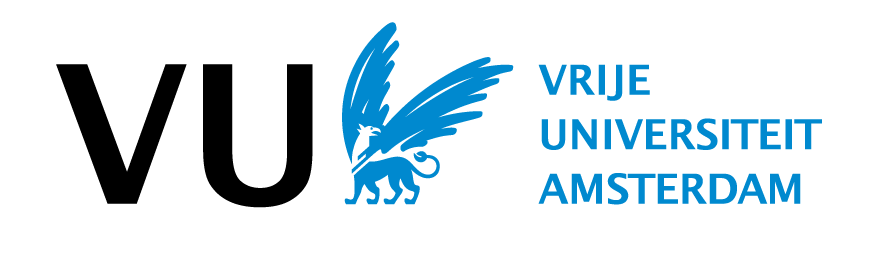
</div>



### Seminars Computational Science
### Julia tutorial

# Why is Julia fast?

by Francesc Verdugo (VU Amsterdam)

2022-11-24

## Contents

We will learn

- Basic julia concepts:
  - type-inference
  - JIT compilation
- Some Julia syntax
- Some useful Julia packages

## Using Jupyter notebooks in Julia

### Running a cell

Click on a cell and press `Shift` + `Enter`

In [ ]:
1+3
4*5

### Cell order is important

In [ ]:
foo() = "Well done!"

In [ ]:
foo()

### Package and help modes

In [ ]:
] add BenchmarkTools DataFrames PyCall Conda Test

In [ ]:
? print

## How fast is Julia code?

### Example

Sum entries of a  given array $a = [a_1,a_2,...,a_n]$

 $$s = \sum_{i=1}^n a_i$$

### 

### Hand-written sum function

### Exercise
Write a function that computes the sum of all elements in array `a`. You can view the solution at the bottom of the notebook.

In [ ]:
# ✍️ Exercise 1
function sum_hand(a)
    # TODO
end

### Test-driven development
Next, you can test your solution. You can use the Julia macro `@test` which is provided in the `Test` package.

In [ ]:
using Test

In [ ]:
a = rand(5)

In [ ]:
@test sum_hand(a) ≈ sum(a)

## Benchmarking
In order to track the performance of your code, it is useful to time the execution of single functions. In Julia, the most conventional way of measuring the computation time is the macro `@time`.  

In [ ]:
a = rand(10^7);

In [ ]:
@time sum_hand(a)

Note that `@time` also measures the compile time of a function if it's the first call to that function. So make sure to run `@time` twice on a freshly compiled function in order to get a more meaningful result. 


Now in order to benchmark our code, we need to run it several times. To do this we can call our code in a for-loop and gather the runtimes using the Julia macro `@elapsed`. This measures the runtime of an expression in seconds, just as the `@time` macro, only `@elapsed` discards the result of the computation and returns the elapsed time instead. 

In [ ]:
@elapsed sum_hand(a)

## BenchmarkTools

The `BenchmarkTools` extension package provides useful macros for sampling runtimes automatically. 

In [ ]:
using BenchmarkTools

First of all, the `@benchmark` macro runs the code multiple times and gives out a lot of details: the minimum and maximum time, mean time, median time, number of samples taken, memory allocations, etc. 

In [ ]:
bch_sum_hand = @benchmark sum_hand($a)

For quick sanity checks, one can use the `@btime` macro, which is a convenience wrapper around `@benchmark`. It returns only the minimum execution time and memory allocations. 

In [ ]:
@btime sum_hand($a)

Similar to the `@elapsed` macro, `BenchmarkTool`'s `@belapsed` discards the return value of the function and instead returns the minimum runtime in seconds. 

In [ ]:
@belapsed sum_hand($a)

As opposed to `@time` and `@elapsed`, `@btime` and `@belapsed` run the code several times and return the minimum runtime, thus eliminating possible compilation times from the measurement. 

### Built-in sum function

In [ ]:
bch_sum = @benchmark sum($a)

### Hand-written sum in Python


In [ ]:
using PyCall

In [ ]:
py"""
def sum_py_hand(A):
    s = 0.0
    for a in A:
        s += a
    return s
"""
sum_py_hand = py"sum_py_hand"

In [ ]:
@test sum(a) ≈ sum_py_hand(a)

In [ ]:
bch_sum_py_hand = @benchmark sum_py_hand($a)

### Numpy sum 

In [ ]:
using Conda

In [ ]:
numpy = pyimport("numpy")
sum_numpy = numpy["sum"]

In [ ]:
@test sum_numpy(a) ≈ sum(a)

In [ ]:
bch_sum_numpy = @benchmark sum_numpy($a)

### Sumary of the results


In [ ]:
timings = [bch_sum_hand,bch_sum,bch_sum_py_hand,bch_sum_numpy]

In [ ]:
methods = ["sum_hand","sum","sum_py_hand","sum_numpy"]

In [ ]:
using DataFrames

In [ ]:
df = DataFrame(method=methods,time=timings)

### Improving the hand-written sum in Julia


In [ ]:
# ✍️ Exercise 3
function sum_hand_fast(a)
    s = 0.0
    @simd for ai in a
       s += ai
    end
    s
end

In [ ]:
@test sum_hand_fast(a) ≈ sum(a)

In [ ]:
@benchmark sum_hand_fast($a)

## Conlcusions so far

- Julia code (for loops) are much faster than in Python
- Julia code can be as fast as optimized C code

## Why Julia is fast?

- Julia is a compiled language (like C, C++, Fortran)
- Julia is JIT compiled (C, C++, Fortran are AOT compiled)
- Type declarations are optional in Julia



# Conclusion: Why we use Julia in this course

- Julia code is fast (it can be as fast as C)
- Julia is a high-level language with simpler syntax than C 
- Julia supports different parallel programming models

We will look into the third point in a later section of this course. 


## Solution to the exercises

### Solution to Exercise 1

In [ ]:
function sum_hand(a)
    s = 0.0
    for ai in a
        s += ai
    end
    s
end

### Solution to Exercise 2

In [ ]:
using Statistics

a = rand(10^7)
num_it = 15
runtimes = zeros(num_it)
for i in 1:num_it
    runtimes[i] = @elapsed sum_hand(a)
end
@show mean(runtimes) 
@show std(runtimes)
@show minimum(runtimes)
@show maximum(runtimes);

In [ ]:
# ✍️ Exercise 3
function sum_hand_fast(a)
    s = 0.0
    @simd for ai in a
       s += ai
    end
    s
end